<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [13]:
img1 = load_img("cat.jpg")

In [14]:
type(img1)

PIL.JpegImagePlugin.JpegImageFile

In [15]:
img1 = img_to_array(img1)
print(type(img1))

<class 'numpy.ndarray'>


In [16]:
img1.shape

(531, 612, 3)

In [17]:
img1 = img1.reshape((1,)+img1.shape)

In [18]:
img1.shape

(1, 531, 612, 3)

In [19]:
datagen = ImageDataGenerator(rotation_range=40, height_shift_range=0.2, width_shift_range=0.2, horizontal_flip=True, fill_mode='reflect')

In [20]:
i = 0
for batch in datagen.flow(img1,batch_size=1, save_to_dir="/content/Images", save_prefix = 'cat', save_format = 'jpeg'):

  i+=1
  if(i>10):
    break

In [21]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print(xtrain.shape, xtest.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [22]:
xtrain = xtrain.reshape(xtrain.shape+(1,))
xtest = xtest.reshape(xtest.shape+(1,))

In [23]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

In [24]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [25]:
print(ytrain[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
datagen = ImageDataGenerator(rotation_range=20, height_shift_range=0.2, width_shift_range=0.2, fill_mode='nearest')

datagen.fit(xtrain)

In [28]:
aug_img = datagen.flow(xtrain,ytrain, batch_size=32)

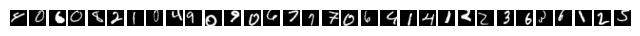

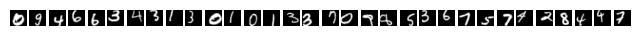

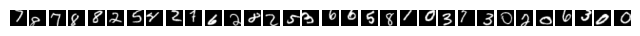

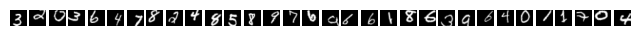

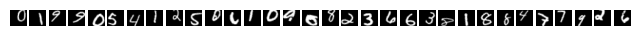

In [31]:
for i in range(5):
  img,_ = aug_img.next()
  plt.figure(figsize=(8,8))
  for j in range(32):
    plt.subplot(1,32,j+1)
    plt.imshow(img[j].reshape(28,28),cmap='gray')
    plt.axis("off")
  plt.show()

In [32]:
model = keras.Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                          MaxPooling2D((2,2)),
                          Conv2D(64,(3,3),activation='relu'),
                          MaxPooling2D((2,2)),
                          Flatten(),
                          Dense(64,activation='relu'),
                          Dense(10,activation='softmax')])

In [34]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [36]:
model.fit(aug_img, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 69s 36ms/step - loss: 0.5154 - accuracy: 0.8323
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1945 - accuracy: 0.9395
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1438 - accuracy: 0.9554
Epoch 4/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1169 - accuracy: 0.9635
Epoch 5/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1013 - accuracy: 0.9680
